# Measuring the Speed of Light

In the late 1800s, Simon Newcomb performed a series of measurements of the speed of light. In this notebook, you will take his raw data and perform some simple analysis and visualization of this data using Pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Raw data

Newcomb measured how long it took (in nanoseconds) for light to travel $7442$ meters. His raw measurements are reported as deviations from $24,800$ nanoseconds. Here is a file with the raw data. This comes from Stigler (1977).

In [2]:
offset = 24800 # add this to raw data to get times in nanoseconds
distance = 7442 # distance in meters traveled

In [3]:
%%writefile speed_of_light.txt
28 26 33 24 34 -44 27 16 40 -2
29 22 24 21 25 30 23 29 31 19
24 20 36 32 36 28 25 21 28 29
37 25 28 26 30 32 36 26 30 22
36 23 27 27 28 27 31 27 26 33
26 32 32 24 39 28 24 25 32 25
29 27 28 29 16 23

Overwriting speed_of_light.txt


## Reading the data

Read the raw data in as a Pandas `DataFrame`:

* Create a column named `raw` with integer valued deviations.
* Name the `DataFrame` `data`.

In [4]:
with open("speed_of_light.txt") as f:
    lines = f.readlines()

lines = [x.strip() for x in lines]
data_array = []

for line in lines:
    line = line.split()
    for number in line:
        data_array.append(number)
    

data = pd.DataFrame(data_array, columns = ["raw"],dtype = int)

In [5]:
assert list(data.columns)==['raw']
assert len(data)==66
assert data.raw.dtype==np.dtype(int)

## Transforming the data

Create two new columns in the `DataFrame`:

* A column named `time` that has the times in nanoseconds.
* A column named `speed` that has the speeds in meters/nanosecond.

In [6]:
data["time"] = data["raw"] + offset
data["speed"] = distance / data["time"]

In [7]:
assert list(data.columns)==['raw', 'time', 'speed']
assert abs(data.time.mean()-24826.0)<1.0
assert abs(data.speed.mean()-0.3)<0.1
assert data.time.dtype==np.dtype(int)
assert data.speed.dtype==np.dtype(float)

## Visualization and outlier removal

Make an appropriately labeled (with units) histogram of the `time` data.

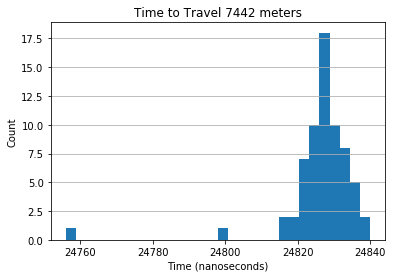

In [8]:
plt.hist("time", bins = 30, data = data)
plt.title("Time to Travel 7442 meters")
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Count")
ax = plt.gca()
ax.grid(axis = "y")

Make an appropriately labeled (with units) histogram of the speed data:

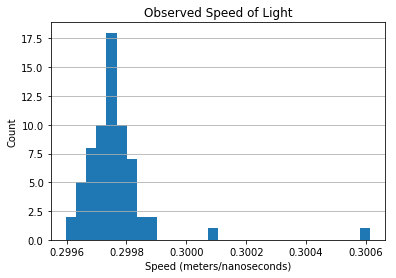

In [9]:
plt.hist("speed", bins = 30, data = data)
plt.title("Observed Speed of Light")
plt.xlabel("Speed (meters/nanoseconds)")
plt.ylabel("Count")
ax = plt.gca()
ax.grid(axis = "y")

Create a new `DataFrame` named `data2` that has the outliers removed:

In [10]:
data2 = data[(data["time"] > 24805) & (data["speed"] < .3)]

Make an appropriately labeled (with units) histogram of the speed data with outliers removed:

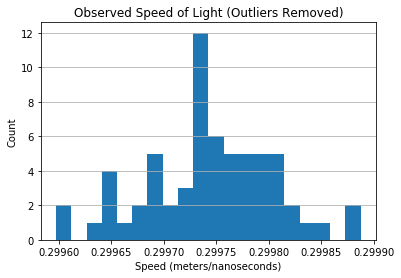

In [11]:
plt.hist("speed", bins = 20, data = data2)
plt.title("Observed Speed of Light (Outliers Removed)")
plt.xlabel("Speed (meters/nanoseconds)")
plt.ylabel("Count")
ax = plt.gca()
ax.grid(axis = "y")

## Bootstrapped mean

Here is the actual speed of light in meters/nanoseconds:

In [12]:
actual = 299792458.0*1e-9

Compute the (`n=500`) bootstrapped distribution of the mean speed of light as a NumPy array named `means`. Use the `sample` method of the Pandas `Series/DataFrame` object to do this.

In [13]:
result = []
for i in range(500):
    sample = data2["speed"].sample(len(data2["speed"]), replace = True)
    result.append(sample.mean())

Make an appropriately labeled histogram of the mean distribution that includes a vertical line where the actual speed of light is. Print the mean and 95% confidence interval of this distribution. Does this experiment agree with the actual speed of light?

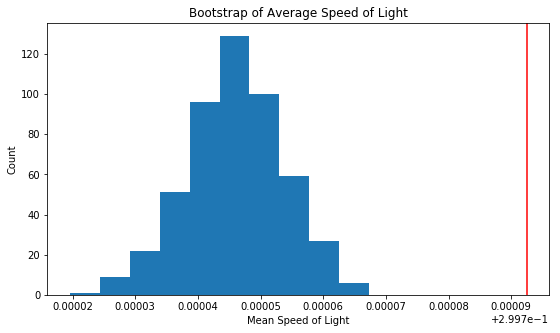

In [14]:
fig = plt.figure(figsize = (9,5))
plt.hist(result)
plt.title("Bootstrap of Average Speed of Light")
plt.xlabel("Mean Speed of Light")
plt.ylabel("Count")
plt.axvline(x= actual, color = "red")
#plt.xticks((0, len(result)), (min(result), max(result)))

In [15]:
print("Mean: ", np.array(result).mean())
print("95% confidence interval:", np.percentile(result, (2.5,97.5)))

Mean:  0.299745947445
95% confidence interval: [ 0.29973092  0.29976064]


Our 95% confidence interval is centered at a mean .29976 which is a bit off from the actual speed of light. Furthermore, the lower and upper bounds of the confidence interval do not contain the actual speed of light. It seems like the experiment disagrees.